In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

#Importing the necessary classes
from pydynamics.process_models import FOPDT

KS Test of Residuals: p=0.976


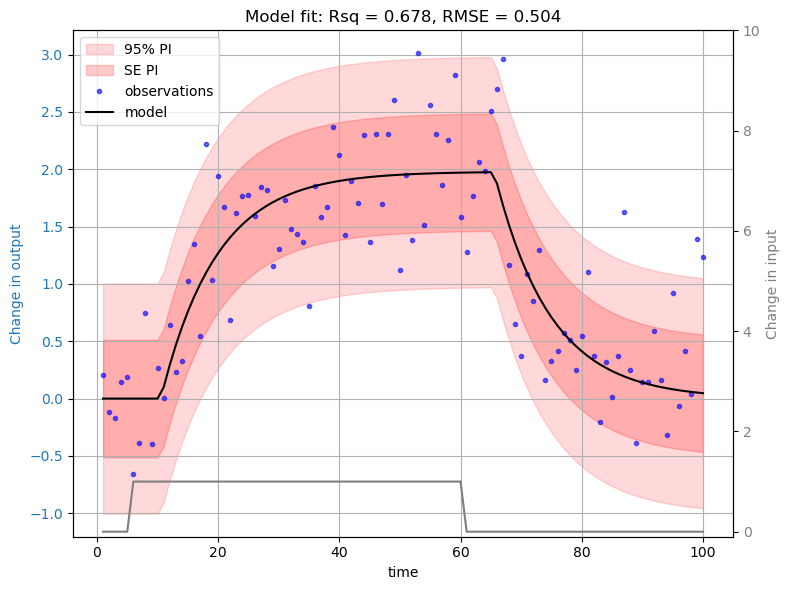

Params: K: 1.980, tau: 9.238, theta: 5.028
SEM: K: 0.676, tau: 5.890, theta: 1.750
P-values: K: 0.004, tau: 0.120, theta: 0.005


In [2]:
# Generate sample data - this part is only for demonstration purposes
# The actual data will be imported from the csv file or provided by the user
t, y, u  = np.ones((3,100))
t = np.cumsum(t)

# Input starts at 0, goes to 1 at t=5, and back to 0 at t=60
u[:5] = u[60:] = 0

# Generate First Order Model
fom = FOPDT(t, y, u) # initialize the model
ys = fom.simulate(np.array([2., 11., 5.])) # simulate the model with given parameters
noise = np.random.normal(0, 0.5, len(ys)) # add noise to the output
yn = ys + noise
fom = FOPDT(t, yn, u) # initialize the model with noisy data
result = fom.fit_model(plot_result=True) # fit the model to the data and plot the results
print(f"Params: K: {result.p_opt[0]:0.3f}, tau: {result.p_opt[1]:0.3f}, theta: {result.p_opt[2]:0.3f}")
sem = np.sqrt(np.diag(result.p_cov)) # Calculate the standard error of the parameters from the covariance matrix
print(f"SEM: K: {sem[0]:0.3f}, tau: {sem[1]:0.3f}, theta: {sem[2]:0.3f}")
print(f"P-values: K: {result.p_val[0]:0.3f}, tau: {result.p_val[1]:0.3f}, theta: {result.p_val[2]:0.3f}")

KS Test of Residuals: p=0.579


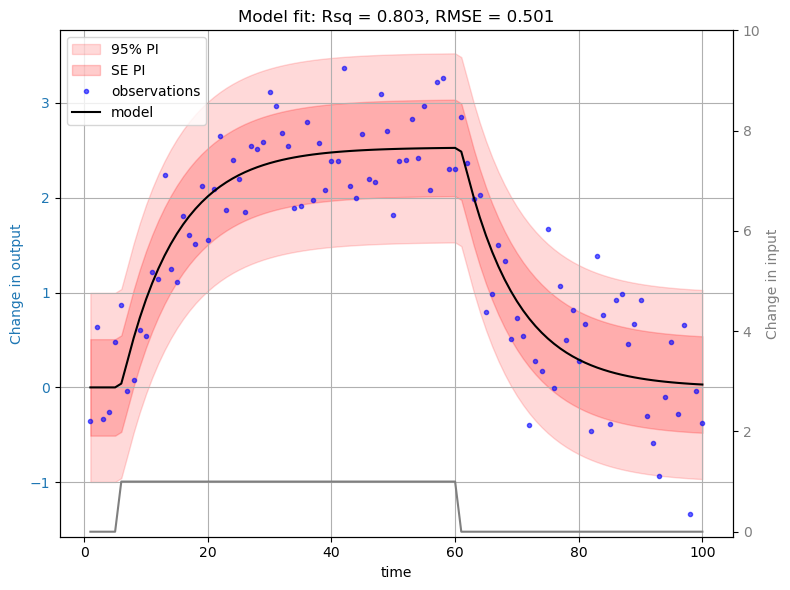

Params: K: 2.530, tau: 8.829, theta: 0.466
SEM: K: 0.645, tau: 4.750, theta: 1.783
P-values: K: 0.000, tau: 0.066, theta: 0.794


In [3]:
# Simulate another model with different parameters
ys = fom.simulate(np.array([2.5, 9., 1.])) # simulate the model with given parameters
noise = np.random.normal(0, 0.5, len(ys)) # add noise to the output
yn = ys + noise


fom2 = FOPDT(t, yn, u) # initialize the model with noisy data
res2 = fom2.fit_model(plot_result=True) # fit the model to the data and plot the results
print(f"Params: K: {res2.p_opt[0]:0.3f}, tau: {res2.p_opt[1]:0.3f}, theta: {res2.p_opt[2]:0.3f}")
sem = np.sqrt(np.diag(res2.p_cov)) # Calculate the standard error of the parameters from the covariance matrix
print(f"SEM: K: {sem[0]:0.3f}, tau: {sem[1]:0.3f}, theta: {sem[2]:0.3f}")
print(f"P-values: K: {res2.p_val[0]:0.3f}, tau: {res2.p_val[1]:0.3f}, theta: {res2.p_val[2]:0.3f}")

In [4]:
# We can also compare the parameters of the two models using the t-test method.

# t-test for K
t_stat, p_val = fom.ttest(2.039, 0.849, len(t), 2.498, 0.719, len(t))
print(f"t-stat: {t_stat:0.3f}, p-value: {p_val:0.3f}")

t-stat: -4.126, p-value: 0.000


Residual ACF:0.005, CCF:0.004, ACFD:0.017, CCFD:0.000


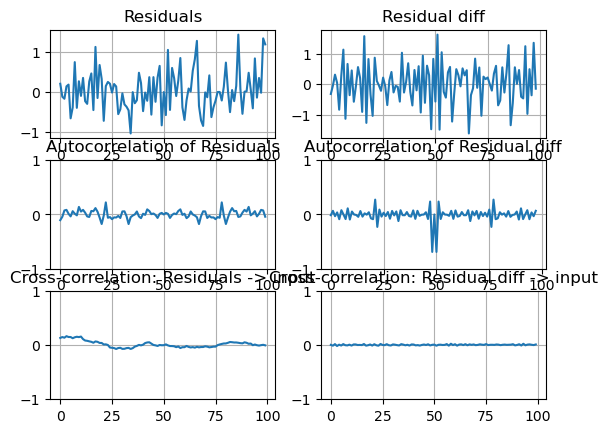

In [5]:
# you can also get a sense of the goodness of fit by looking at the residuals, and their correlations
fom.diagnostics()

### Notes

The numbers returned are the mean of the autocorrelation and cross-correlation of the residuals and the first order difference of the residuals
The closer to 0 the better. Keep an eye out for values that are close to 1, as this may indicate that the residuals are not gaussian white noise. 

An autocorrelation of residuals that disappears in the difference of the residuals is a good sign that the model is a good fit. No correlation between residuals and the input is also a good sign that the model is capturing the dynamics of the system.

The model does a good job at estimating data generated from complex inputs, such as brown noise and white noise. However, the condition is that the relationship between input and output is always linear, which is not always the case in biological systems. If the model fails to return a good fit, it means the relationship between input and output is either non-linear or non-existent. It is beyond the scope of the model to tell these two apart. Do with that information what you will. 

KS Test of Residuals: p=0.732


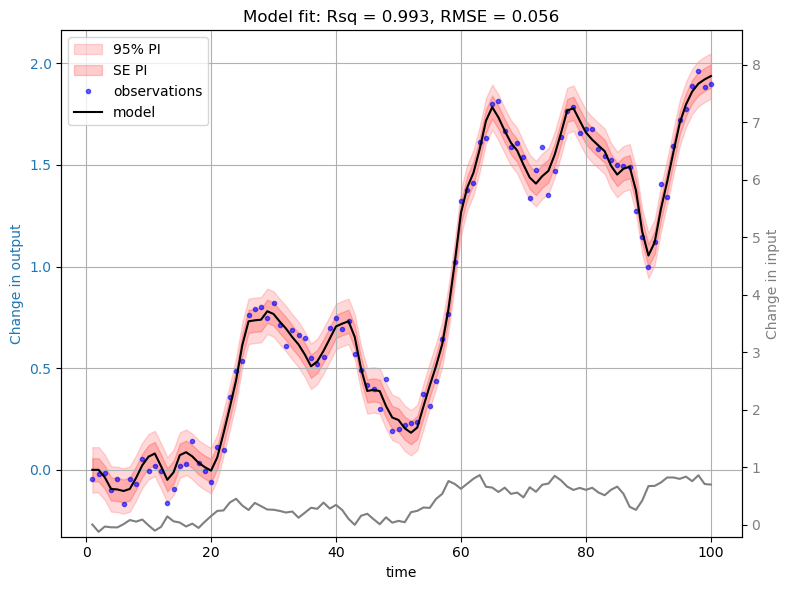

Params: K: 2.479, tau: 2.730, theta: 1.154
SEM: K: 0.037, tau: 0.185, theta: 0.076
P-values: K: 0.000, tau: 0.000, theta: 0.000
Residual ACF:0.009, CCF:0.001, ACFD:0.020, CCFD:0.000


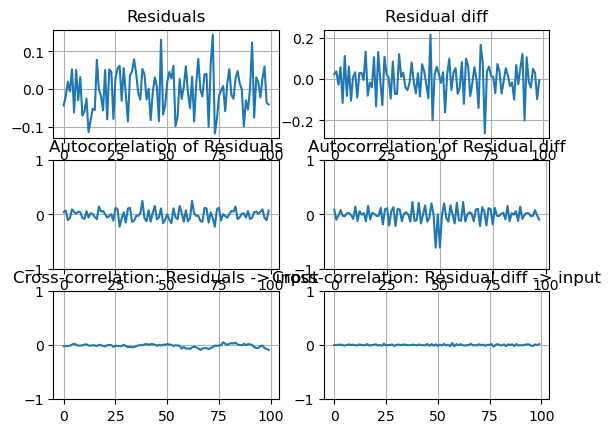

In [6]:
# Simulate another model with different parameters
noise = np.random.normal(0, 0.1, len(ys)) # add noise to the output
u = np.cumsum(noise)
u -= u[0]

fom3 = FOPDT(t, yn, u) # initialize the model with noisy data
ys = fom3.simulate(np.array([2.5, 3., 1.])) # initialize the model with noisy data
noise = np.random.normal(0, 0.05, len(ys)) # add noise to the output
ys = ys + noise
fom3 = FOPDT(t, ys, u) # initialize the model with noisy data
res3 = fom3.fit_model(plot_result=True) # fit the model to the data and plot the results
print(f"Params: K: {res3.p_opt[0]:0.3f}, tau: {res3.p_opt[1]:0.3f}, theta: {res3.p_opt[2]:0.3f}")
sem = np.sqrt(np.diag(res3.p_cov)) # Calculate the standard error of the parameters from the covariance matrix
print(f"SEM: K: {sem[0]:0.3f}, tau: {sem[1]:0.3f}, theta: {sem[2]:0.3f}")
print(f"P-values: K: {res3.p_val[0]:0.3f}, tau: {res3.p_val[1]:0.3f}, theta: {res3.p_val[2]:0.3f}")
fom3.diagnostics()

KS Test of Residuals: p=0.875


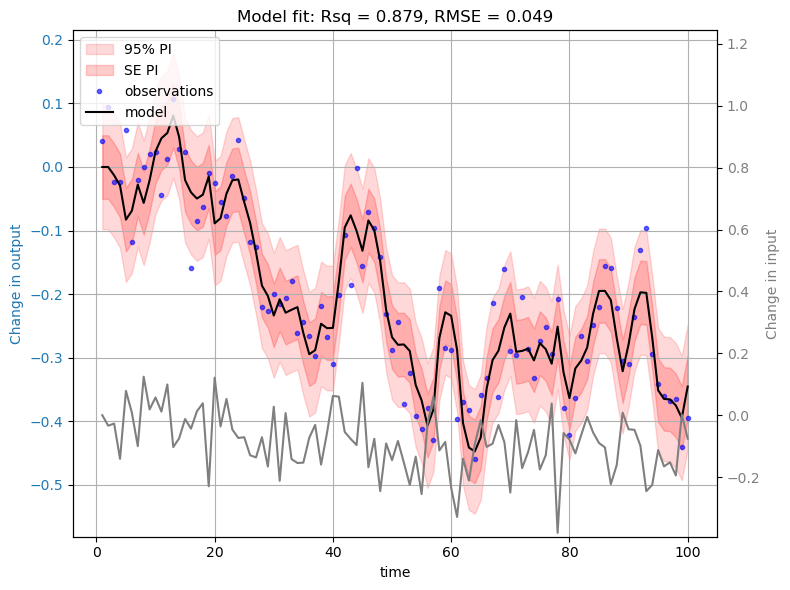

Params: K: 2.558, tau: 3.418, theta: 0.928
SEM: K: 0.178, tau: 0.426, theta: 0.074
P-values: K: 0.000, tau: 0.000, theta: 0.000
Residual ACF:0.005, CCF:0.004, ACFD:0.021, CCFD:0.004


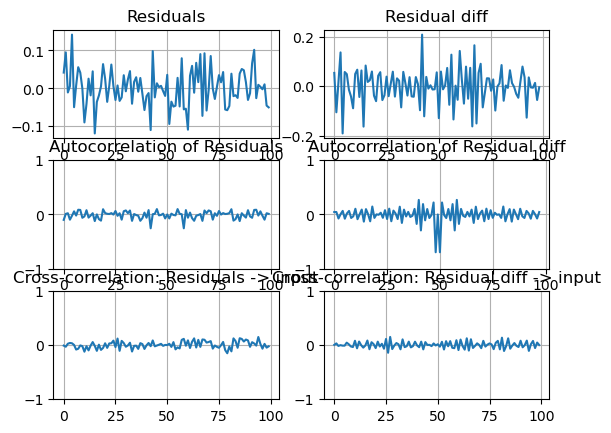

In [7]:
# Simulate another model with different parameters
u = np.random.normal(0, 0.1, len(ys)) # add noise to the output
u -= u[0]

fom3 = FOPDT(t, yn, u) # initialize the model with noisy data
ys = fom3.simulate(np.array([2.5, 3., 1.])) # initialize the model with noisy data
noise = np.random.normal(0, 0.05, len(ys)) # add noise to the output
ys = ys + noise
fom3 = FOPDT(t, ys, u) # initialize the model with noisy data
res3 = fom3.fit_model(plot_result=True) # fit the model to the data and plot the results
print(f"Params: K: {res3.p_opt[0]:0.3f}, tau: {res3.p_opt[1]:0.3f}, theta: {res3.p_opt[2]:0.3f}")
sem = np.sqrt(np.diag(res3.p_cov)) # Calculate the standard error of the parameters from the covariance matrix
print(f"SEM: K: {sem[0]:0.3f}, tau: {sem[1]:0.3f}, theta: {sem[2]:0.3f}")
print(f"P-values: K: {res3.p_val[0]:0.3f}, tau: {res3.p_val[1]:0.3f}, theta: {res3.p_val[2]:0.3f}")
fom3.diagnostics()